<a href="https://colab.research.google.com/github/matheusglima/PostgreSQL/blob/master/Carteiras_Semanas_aleat%C3%B3rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import random
sns.set()

In [0]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9fbcc4cf3963ec9ee29af6627160cfbcdd9f9fc9cc85a01398e173c3fa8a2d1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-cvpq49fn/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


Obtendo dados do mercado

In [7]:
tickers_ibov = 'ABEV3.SA ALPA4.SA AZUL4.SA ARZZ3.SA BBAS3.SA B3SA3.SA BTOW3.SA BBDC4.SA BPAN4.SA BBSE3.SA BPAC11.SA BRKM5.SA BRAP4.SA BRFS3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA EQTL3.SA ELET3.SA ELET6.SA EMBR3.SA EZTC3.SA EVEN3.SA ENBR3.SA FLRY3.SA FRAS3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HBOR3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA JSLG3.SA KLBN11.SA LAME4.SA LREN3.SA LEVE3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA ODPV3.SA PCAR4.SA RAPT4.SA POMO4.SA PETR3.SA PETR4.SA PRIO3.SA QUAL3.SA RAIL3.SA RADL3.SA RENT3.SA SAPR4.SA STBP3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TUPY3.SA TRIS3.SA TIET11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA WIZS3.SA YDUQ3.SA'
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')['Adj Close']

ibov = yf.download('BOVA11.SA', period='1y')['Adj Close']
ibov = ibov/ibov.iloc[0]

[*********************100%***********************]  89 of 89 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=249)
dados_yahoo

,ABEV3.SA,ALPA4.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,EVEN3.SA,EZTC3.SA,FLRY3.SA,FRAS3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HBOR3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,JSLG3.SA,LAME4.SA,LEVE3.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,ODPV3.SA,PETR3.SA,PETR4.SA,POMO4.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RAPT4.SA,RENT3.SA,SAPR4.SA,SBSP3.SA,SMLS3.SA,STBP3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,TRIS3.SA,TUPY3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-29,16.818281,18.221863,48.754299,38.150002,35.000542,49.037968,30.448065,26.212759,5.704842,30.269472,28.730000,41.150837,31.856600,12.482984,6.494272,14.013675,9.985056,22.310839,46.400002,16.330601,48.380859,15.480666,9.05,40.394176,31.421186,32.809372,19.280001,18.393282,16.695999,6.264825,20.815098,19.383167,4.644061,13.911166,40.709568,6.513206,26.490000,36.888256,1.27,29.289310,29.501394,38.652531,33.496983,11.555133,33.466633,20.691555,12.828553,15.891365,22.083782,42.342060,23.494667,6.78,15.265766,23.460724,15.671196,27.738747,25.761929,3.524004,18.000000,18.413563,68.900864,19.170000,8.154390,35.962254,3.746602,42.986435,37.242496,4.121889,33.250000,10.494190,39.924988,5.830508,19.059999,19.567696,8.173528,48.417038,43.288589,4.58,18.844458,9.010202
2019-05-30,16.983931,18.451508,49.300312,39.299999,35.572422,49.756290,31.008219,26.391136,6.826138,30.259676,29.010000,39.983715,32.044399,12.559098,6.494272,14.307669,10.034880,22.934158,46.709999,16.516289,51.035122,15.718689,9.36,41.530846,31.692068,32.565720,19.150000,18.538876,17.080000,6.509545,21.360254,19.499348,4.624507,13.812154,41.257679,6.473672,27.090000,36.143337,1.28,28.787378,29.433775,39.598919,33.949493,11.716676,33.813633,21.766695,13.373395,16.127106,22.308029,43.177116,23.943930,6.78,15.086170,24.120064,15.602893,27.690756,25.421677,3.495120,17.740000,19.027348,69.248360,19.360001,8.300876,35.990578,3.876409,42.773632,38.117851,4.161714,33.299999,10.542595,39.142147,5.820775,19.100000,19.431065,8.242795,48.719032,43.852348,4.80,18.814842,9.046755
2019-05-31,17.100859,18.331694,50.134228,39.200001,35.446415,49.660519,30.932981,26.614111,7.917927,30.073555,27.700001,41.607960,31.036200,12.720844,6.436631,14.464464,10.303939,22.904476,47.139999,16.164465,51.124256,15.965868,9.46,43.512981,32.140392,33.427887,18.950001,19.257133,17.230000,6.754265,21.806293,19.170162,4.556068,13.732944,40.859055,6.404487,26.980000,36.530697,1.27,28.925163,29.192278,39.847969,33.161751,11.773691,33.736511,21.365963,13.224803,15.852044,22.239782,43.265537,24.330032,6.83,15.445365,24.444813,15.924903,27.095665,24.838385,3.504748,17.370001,19.324652,68.920731,19.360001,8.281343,35.877384,3.991462,42.763958,37.918911,4.141801,32.080002,10.649086,39.142147,5.937579,19.639999,20.182543,8.114155,47.735104,44.406857,4.70,18.804972,9.055893
2019-06-03,16.974186,17.922327,49.776833,39.689999,35.378559,49.890385,30.832655,27.024380,6.983513,29.965799,27.600000,40.071247,30.344299,12.521041,6.465451,14.405665,10.353765,22.706596,47.490002,15.714908,50.708294,16.020796,9.44,44.255104,32.476685,33.709034,18.910000,19.033892,17.379999,6.852152,21.508936,19.266983,4.595176,13.802253,40.859055,6.404487,27.309999,36.868393,1.29,29.161367,29.076359,39.927670,32.517265,11.821280,33.828136,20.740425,13.096022,15.439602,22.473782,43.127998,24.173626,6.54,14.861673,24.366087,15.944419,27.690756,25.266130,3.572147,17.500000,19.506868,69.099434,19.520000,8.154390,36.103668,4.065211,42.618866,38.436161,4.281189,31.250000,10.755576,38.765583,5.840242,19.870001,19.987352,7.916249,47.569496,45.284828,4.96,18.893814,9.046755
2019-06-04,16.905977,17.622787,48.148716,40.000000,35.233166,50.704491,30.99227

In [20]:
retorno = dados_yahoo.pct_change()

,ABEV3.SA,ALPA4.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,EVEN3.SA,EZTC3.SA,FLRY3.SA,FRAS3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HBOR3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,JSLG3.SA,LAME4.SA,LEVE3.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,ODPV3.SA,PETR3.SA,PETR4.SA,POMO4.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RAPT4.SA,RENT3.SA,SAPR4.SA,SBSP3.SA,SMLS3.SA,STBP3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,TRIS3.SA,TUPY3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-30,0.009849,0.012603,0.011199,0.030144,0.016339,0.014648,0.018397,0.006805,0.196552,-0.000324,0.009746,-0.028362,0.005895,0.006097,0.000000,0.020979,0.004990,0.027938,0.006681,0.011371,0.054862,0.015375,0.034254,0.028139,0.008621,-0.007426,-0.006743,0.007916,0.023000,0.039062,0.026190,0.005994,-0.004210,-0.007117,0.013464,-0.006070,0.022650,-0.020194,0.007874,-0.017137,-0.002292,0.024485,0.013509,0.013980,0.010369,0.051960,0.042471,0.014835,0.010154,0.019722,0.019122,0.000000,-0.011765,0.028104,-0.004359,-0.001730,-0.013208,-0.008197,-0.014444,0.033333,0.005043,0.009911,0.017964,0.000788,0.034647,-0.004950,0.023504,0.009662,0.001504,0.004613,-0.019608,-0.001669,0.002099,-0.006982,0.008475,0.006237,0.013023,0.048035,-0.001572,0.004057
2019-05-31,0.006885,-0.006493,0.016915,-0.002544,-0.003542,-0.001925,-0.002426,0.008449,0.159942,-0.006151,-0.045157,0.040623,-0.031463,0.012879,-0.008876,0.010959,0.026812,-0.001294,0.009206,-0.021302,0.001747,0.015725,0.010684,0.047727,0.014146,0.026475,-0.010444,0.038743,0.008782,0.037594,0.020882,-0.016882,-0.014799,-0.005735,-0.009662,-0.010687,-0.004061,0.010717,-0.007812,0.004786,-0.008205,0.006289,-0.023203,0.004866,-0.002281,-0.018410,-0.011111,-0.017056,-0.003059,0.002048,0.016125,0.007375,0.023810,0.013464,0.020638,-0.021491,-0.022945,0.002755,-0.020857,0.015625,-0.004731,0.000000,-0.002353,-0.003145,0.029680,-0.000226,-0.005219,-0.004785,-0.036637,0.010101,0.000000,0.020067,0.028272,0.038674,-0.015606,-0.020196,0.012645,-0.020833,-0.000525,0.001010
2019-06-03,-0.007407,-0.022331,-0.007129,0.012500,-0.001914,0.004629,-0.003243,0.015415,-0.118012,-0.003583,-0.003610,-0.036933,-0.022293,-0.015707,0.004478,-0.004065,0.004836,-0.008639,0.007425,-0.027811,-0.008136,0.003440,-0.002114,0.017055,0.010463,0.008411,-0.002111,-0.011593,0.008706,0.014493,-0.013636,0.005051,0.008584,0.005047,0.000000,0.000000,0.012231,0.009244,0.015748,0.008166,-0.003971,0.002000,-0.019435,0.004042,0.002716,-0.029277,-0.009738,-0.026018,0.010522,-0.003179,-0.006429,-0.042460,-0.037791,-0.003221,0.001226,0.021963,0.017221,0.019231,0.007484,0.009429,0.002593,0.008264,-0.015330,0.006307,0.018477,-0.003393,0.013641,0.033654,-0.025873,0.010000,-0.009620,-0.016393,0.011711,-0.009671,-0.024390,-0.003469,0.019771,0.055319,0.004724,-0.001009
2019-06-04,-0.004018,-0.016713,-0.032708,0.007811,-0.004110,0.016318,0.005177,0.008581,0.007042,0.003923,0.016667,-0.171116,-0.006515,0.002280,-0.019317,0.013605,0.025024,0.002179,0.016424,0.044154,-0.019141,0.018857,0.004237,-0.012736,0.012366,0.010564,-0.012163,0.048445,-0.009896,0.035714,0.013825,0.000000,0.000000,-0.005739,-0.002439,-0.004630,0.029293,-0.024515,-0.007752,-0.001012,-0.029900,0.023203,0.014114,0.002415,-0.001711,0.054194,0.010590,0.008266,-0.009111,-0.014579,-0.001130,0.035168,0.038389,0.017367,-0.002448,0.005893,0.008080,-0.032345,-0.006857,0.00

In [22]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ALPA4.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,EVEN3.SA,EZTC3.SA,FLRY3.SA,FRAS3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HBOR3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,JSLG3.SA,LAME4.SA,LEVE3.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,ODPV3.SA,PETR3.SA,PETR4.SA,POMO4.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RAPT4.SA,RENT3.SA,SAPR4.SA,SBSP3.SA,SMLS3.SA,STBP3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,TRIS3.SA,TUPY3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-05-30,1.009849,1.012603,1.011199,1.030144,1.016339,1.014648,1.018397,1.006805,1.196552,0.999676,1.009746,0.971638,1.005895,1.006097,1.000000,1.020979,1.004990,1.027938,1.006681,1.011371,1.054862,1.015375,1.034254,1.028139,1.008621,0.992574,0.993257,1.007916,1.023000,1.039062,1.026190,1.005994,0.995790,0.992883,1.013464,0.993930,1.022650,0.979806,1.007874,0.982863,0.997708,1.024485,1.013509,1.013980,1.010369,1.051960,1.042471,1.014835,1.010154,1.019722,1.019122,1.000000,0.988235,1.028104,0.995641,0.998270,0.986792,0.991803,0.985556,1.033333,1.005043,1.009911,1.017964,1.000788,1.034647,0.995050,1.023504,1.009662,1.001504,1.004613,0.980392,0.998331,1.002099,0.993018,1.008475,1.006237,1.013023,1.048035,0.998428,1.004057
2019-05-31,1.016802,1.006027,1.028304,1.027523,1.012739,1.012695,1.015926,1.015311,1.387931,0.993528,0.964149,1.011108,0.974247,1.019055,0.991124,1.032168,1.031936,1.026608,1.015948,0.989827,1.056704,1.031342,1.045304,1.077209,1.022889,1.018852,0.982884,1.046966,1.031984,1.078125,1.047619,0.989011,0.981053,0.987189,1.003672,0.983308,1.018498,0.990307,1.000000,0.987567,0.989522,1.030928,0.989992,1.018914,1.008064,1.032593,1.030888,0.997526,1.007064,1.021810,1.035556,1.007375,1.011765,1.041946,1.016189,0.976816,0.964151,0.994536,0.965000,1.049479,1.000288,1.009911,1.015569,0.997640,1.065355,0.994824,1.018162,1.004831,0.964812,1.014760,0.980392,1.018364,1.030430,1.031422,0.992736,0.985915,1.025833,1.026201,0.997905,1.005071
2019-06-03,1.009270,0.983562,1.020973,1.040367,1.010800,1.017383,1.012631,1.030963,1.224138,0.989968,0.960668,0.973765,0.952528,1.003049,0.995562,1.027972,1.036926,1.017738,1.023491,0.962298,1.048107,1.034891,1.043094,1.095581,1.033592,1.027421,0.980809,1.034828,1.040968,1.093750,1.033333,0.994006,0.989474,0.992171,1.003672,0.983308,1.030955,0.999462,1.015748,0.995632,0.985593,1.032990,0.970752,1.023033,1.010802,1.002362,1.020849,0.971572,1.017660,1.018562,1.028898,0.964602,0.973529,1.038591,1.017435,0.998270,0.980755,1.013661,0.972222,1.059375,1.002882,1.018258,1.000000,1.003932,1.085039,0.991449,1.032051,1.038647,0.939850,1.024908,0.970960,1.001670,1.042497,1.021446,0.968523,0.982495,1.046115,1.082969,1.002619,1.004057
2019-06-04,1.005214,0.967123,0.987579,1.048493,1.006646,1.033984,1.017873,1.039809,1.232759,0.993851,0.976679,0.807138,0.946322,1.005335,0.976331,1.041958,1.062874,1.019956,1.040302,1.004788,1.028045,1.054406,1.047514,1.081628,1.046373,1.038275,0.968880,1.084960,1.03066

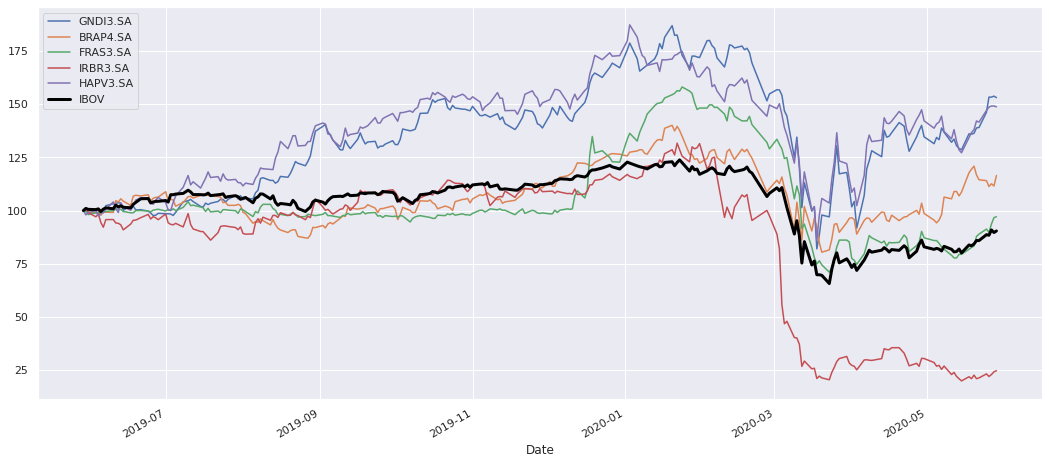

In [93]:
for i in range(5):
    carteira = random.choices(dados_yahoo.columns, k=1)
    carteira = 100 * retorno_acumulado.loc[:, carteira]
    carteira['saldo'] = carteira.sum(axis=1)
    carteira['saldo'].plot(figsize=(18,8), label=carteira.columns[0])
(ibov * 100).plot(linewidth=3, color='black', label= 'IBOV')
plt.legend()